In [7]:
import pandas as pd
import json
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

# Leer configuración
with open("/home/dcontreras/ETL/credentials.json") as f:
    config = json.load(f)

user = config["user"]
password = config["password"]
host = config["host"]
port = config["port"]
database = config["database"]
table_name = config["table"]

# Crear conexión con SQLAlchemy
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

# Cargar los datos de la tabla de la API
df = pd.read_sql(f"SELECT * FROM {table_name};", engine)

# Mostrar muestra aleatoria
df.sample(10)


,country_id,country_name,year,inflation,unemployment
5440,XP,Middle income,2019,2.675992,5.712731
1473,EU,European Union,2003,2.091998,9.012696
3053,MT,Malta,2023,5.093968,NaN
3343,NO,Norway,2005,1.532134,4.381000
3012,MR,Mauritania,2006,6.241033,9.607000
2273,JM,Jamaica,2023,6.474137,NaN
4432,T4,East Asia & Pacific (IDA & IBRD countries),2021,2.612482,NaN
2475,KR,"Korea, Rep.",2000,2.259166,4.400000
5546,Z4,East Asia & Pacific,2009,1.621730,4.448956
1348,EC,Ecuador,2018,-0.224103,3.530000


## Tipos de datos

In [8]:
df.dtypes

country_id       object
country_name     object
year              int64
inflation       float64
unemployment    float64
dtype: object

## Revisión Valores nulos

In [9]:
df.isnull().sum()

country_id         0
country_name       0
year               0
inflation        363
unemployment    1599
dtype: int64

## Análisis Univariado

In [10]:
print("Resumen estadístico:")
print(df.describe())

Resumen estadístico:
              year    inflation  unemployment
count  5824.000000  5461.000000   4225.000000
mean   2011.331902     6.146233      7.808953
std       6.817579    17.709686      5.709291
min    2000.000000   -16.859691      0.091000
25%    2005.000000     1.881108      3.983000
50%    2011.000000     3.641273      6.177000
75%    2017.000000     6.575900     10.168000
max    2023.000000   557.201817     37.250000


Histograma de inflación

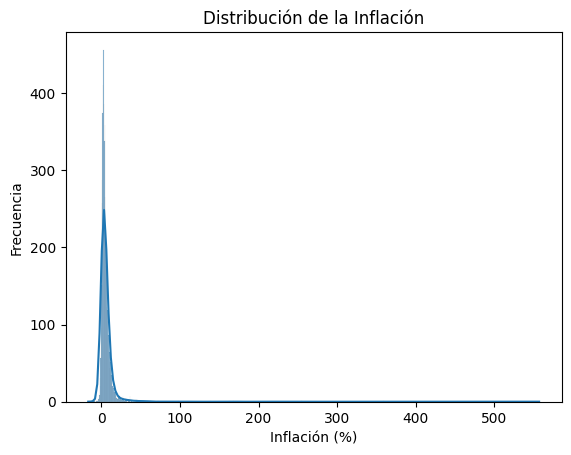

In [11]:
sns.histplot(df['inflation'].dropna(), kde=True)
plt.title('Distribución de la Inflación')
plt.xlabel('Inflación (%)')
plt.ylabel('Frecuencia')
plt.show()

Histograma de desempleo

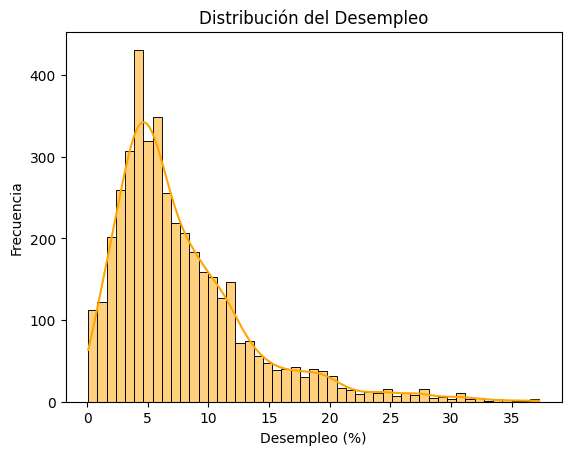

In [12]:
sns.histplot(df['unemployment'].dropna(), kde=True, color='orange')
plt.title('Distribución del Desempleo')
plt.xlabel('Desempleo (%)')
plt.ylabel('Frecuencia')
plt.show()

## Análisis Bivariado

Relación entre inflación y desempleo

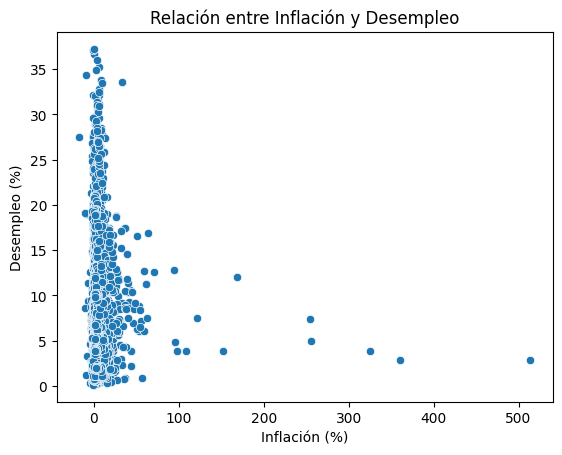

In [13]:
sns.scatterplot(x='inflation', y='unemployment', data=df)
plt.title('Relación entre Inflación y Desempleo')
plt.xlabel('Inflación (%)')
plt.ylabel('Desempleo (%)')
plt.show()

Boxplot de inflación por año

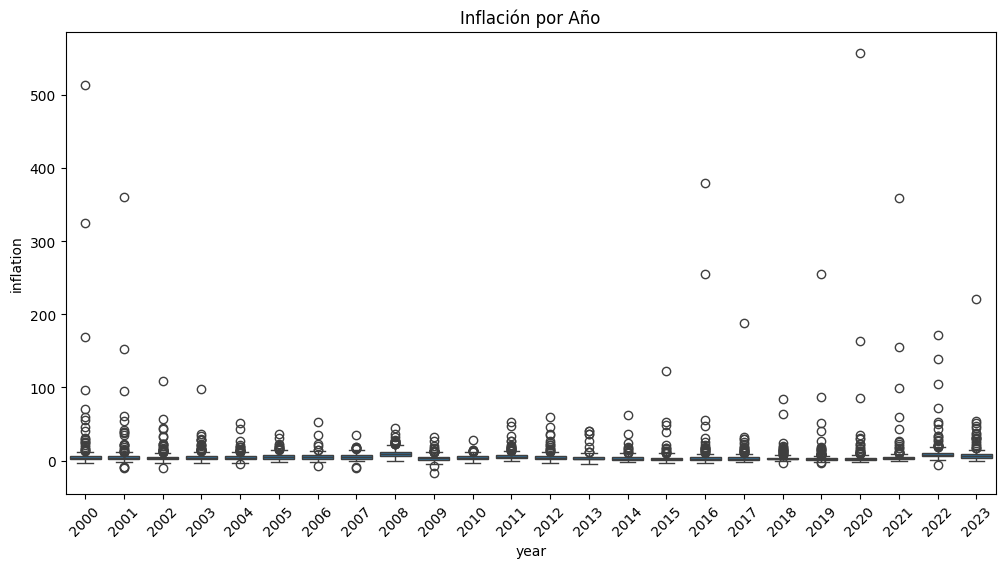

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='inflation', data=df)
plt.title('Inflación por Año')
plt.xticks(rotation=45)
plt.show()

## Análisis Multivariado

Scatter plot multivariado con color por año

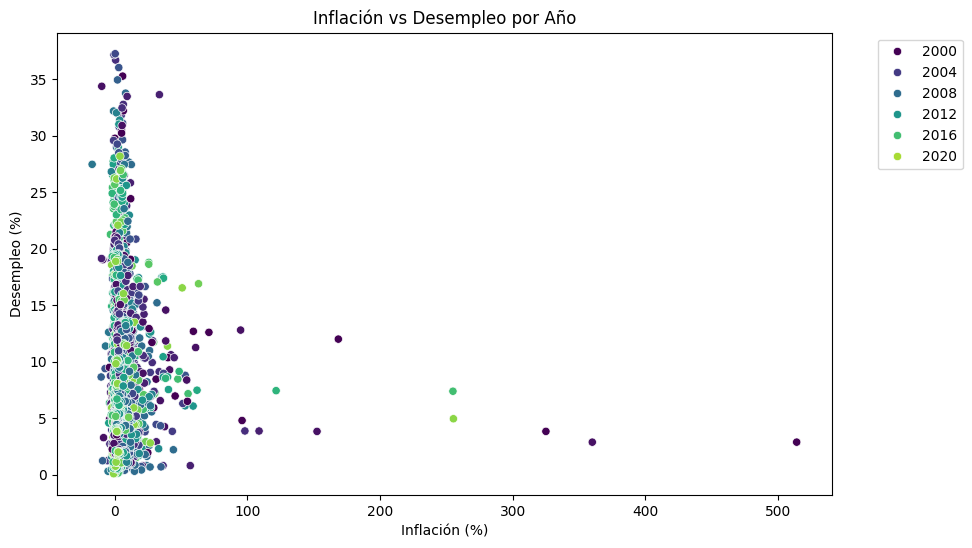

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='inflation', y='unemployment', hue='year', data=df, palette='viridis')
plt.title('Inflación vs Desempleo por Año')
plt.xlabel('Inflación (%)')
plt.ylabel('Desempleo (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()